In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
def plotrange(X):
    Xrange = np.percentile(X, [2.0, 98.0])
    span = Xrange[1] - Xrange[0]
    return Xrange[0]-span*0.2, Xrange[1]+span*0.2

def fit(x, y, nbins=30, bindiff=1, clipend=0, binNMin=100, plot=True):
    xrange = plotrange(x)
    yrange = plotrange(y)

    xbins = np.linspace(xrange[0], xrange[1], nbins)
    ybins = np.linspace(yrange[0], yrange[1], nbins)

    if plot:
        plt.hist2d(x, y, bins=[xbins, ybins])

    xs = []
    ys = []
    for xlo, xhi in zip(xbins[:-1], xbins[1:]):
        w = (x > xlo) & (x < xhi)
        if np.sum(w) < binNMin:
            continue
        ys.append(np.mean(y[w]))        
        xs.append(0.5*(xlo+xhi))
    if clipend is not 0:
        xs = xs[clipend:-clipend]
        ys = ys[clipend:-clipend]
    if plot:
        plt.plot(xs, ys, c='r')
        plt.axhline(0.0, c='k')
    coefs = np.polyfit(xs, ys, deg=1)
    return coefs

In [86]:
def generate_uniform_x(xsig=1, ysig=1, N=int(5e5), m=0.1):
    xs = np.random.uniform(low=-1, high=1, size=N)
    ys = xs * m
    xs += np.random.normal(scale=xsig, size=N)
    ys += np.random.normal(scale=ysig, size=N)
    return xs, ys

0.0231724918205 0.000223101144486


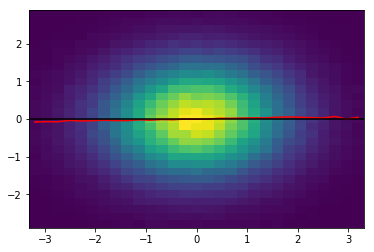

In [106]:
xsig=1.0
ysig=1.0
Ntrials=10
fit(*generate_uniform_x(xsig=xsig, ysig=ysig))
ms = [fit(*generate_uniform_x(xsig=xsig, ysig=ysig), plot=False)[0] 
      for _ in range(Ntrials)]
print(np.mean(ms), np.std(ms)/Ntrials)

0.095044831678 0.00366515724025


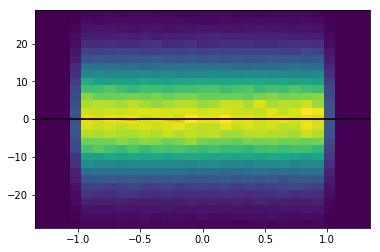

In [108]:
xsig=0.0
ysig=10.0
Ntrials=10
fit(*generate_uniform_x(xsig=xsig, ysig=ysig))
ms = [fit(*generate_uniform_x(xsig=xsig, ysig=ysig), plot=False)[0] 
      for _ in range(Ntrials)]
print(np.mean(ms), np.std(ms)/Ntrials)

In [109]:
def generate_normal_x(xsig=1, ysig=1, N=int(5e5), m=0.1):
    xs = np.random.normal(size=N)
    ys = xs * m
    xs += np.random.normal(scale=xsig, size=N)
    ys += np.random.normal(scale=ysig, size=N)
    return xs, ys

0.0233060994514 0.000184349938617


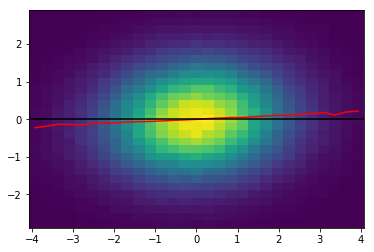

In [129]:
xsig=1.0
ysig=1.0
Ntrials=10
m=0.1
fit(*generate_normal_x(xsig=xsig, ysig=ysig, m=m))
ms = [fit(*generate_uniform_x(xsig=xsig, ysig=ysig, m=m), plot=False)[0] 
      for _ in range(Ntrials)]
print(np.mean(ms), np.std(ms)/Ntrials)

-0.0984916651593 0.000200765669877


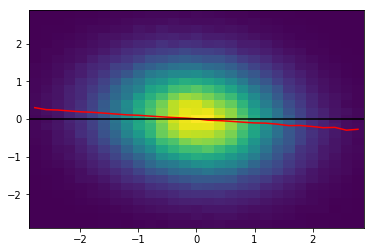

In [114]:
xsig=0.0
ysig=1.0
Ntrials=10
m=-0.1
fit(*generate_normal_x(xsig=xsig, ysig=ysig, m=m))
ms = [fit(*generate_uniform_x(xsig=xsig, ysig=ysig, m=m), plot=False)[0] 
      for _ in range(Ntrials)]
print(np.mean(ms), np.std(ms)/Ntrials)